In [1]:
import healpy as hp 
import sys
sys.path.append('../')

In [2]:
%load_ext autoreload
%autoreload 2
from taunet.Noise.ncm import NoiseModel

In [3]:
ncm = NoiseModel()

3318
(11009124,)


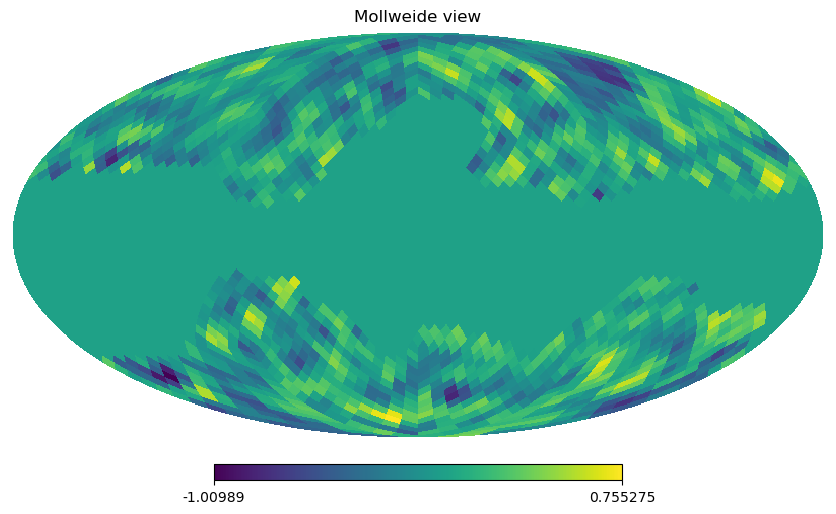

In [4]:
hp.mollview(ncm.noisemap(100))